In [1]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
%matplotlib inline

In [2]:
X = np.array([[4, 7], [3.5, 8], [3.1, 6.2], [0.5, 1], [1, 2], [1.2, 1.9], [6, 2], [5.7, 1.5], [5.4, 2.2]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])

In [3]:
classifier100 = linear_model.LogisticRegression(solver='liblinear', C=100)
classifier1 = linear_model.LogisticRegression(solver='liblinear', C=1)
classifier1000 = linear_model.LogisticRegression(solver='liblinear', C=10000)

#参数 solver 指定解方程组的算法有不同。
#参数 C 控制正则项的强度，值越大，对误分类的惩罚越强

In [4]:
classifier100.fit(X, y)
classifier1.fit(X, y)
classifier1000.fit(X, y)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

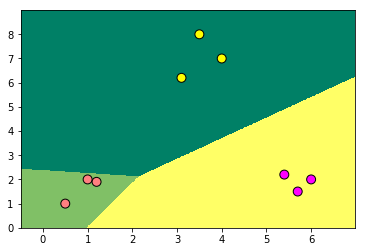

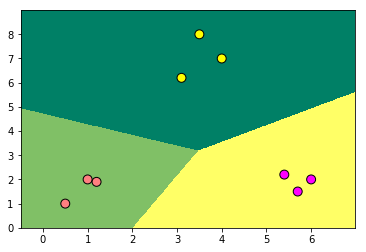

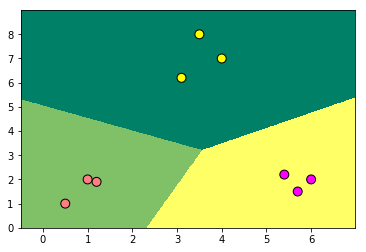

In [5]:
# 画图的原理是，一个坐标系，分成 n x m 个网格点，对这些网格（点）填充不同的颜色。
# 具体地，先定义坐标图的尺寸x_min,x_max,y_min,y_max
# 根据x、y轴的x_min,x_max,y_min,y_max分出网格图，各网格点有相应的坐标，将这些网格点也当作训练数据代入训练好的分类器；
# 同时对test data 预测分类，上色。

def plot_classifier(classifier, X, y):
    # define ranges to plot the figure
    x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0
    y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0
    
    # 画边界线
    # denote the step size that will be used in the mesh grid
    step_size = 0.01
    
    # define the mesh grid（坐标网格） x_values 和 y_values 变量包含一组网格点，这些点的坐标值将被求出
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))
    
    # compute the classifier output
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])
    
    # reshape the array
    mesh_output = mesh_output.reshape(x_values.shape)
    
    # Plot the output using a colored plot
    plt.figure()
    
    # choose a color scheme 
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.summer)
    
    # Overlay the training points on the plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black', linewidth=1, cmap=plt.cm.spring_r)
    
    # specify the boundaries of the figure. The limits of the display figure are set using plt.xlim and plt.ylim.
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())

    # specify the ticks on the X and Y axes in order to see where the points are located
    plt.xticks((np.arange(int(min(X[:, 0])-1), int(max(X[:, 0])+1), 1.0)))
    plt.yticks((np.arange(int(min(X[:, 1])-1), int(max(X[:, 1])+1), 1.0)))
    plt.show()
    

plot_classifier(classifier1, X, y)
plot_classifier(classifier100, X, y)
plot_classifier(classifier1000, X, y)

## 画分界线详解

In [6]:
X
y

array([[ 4. ,  7. ],
       [ 3.5,  8. ],
       [ 3.1,  6.2],
       [ 0.5,  1. ],
       [ 1. ,  2. ],
       [ 1.2,  1.9],
       [ 6. ,  2. ],
       [ 5.7,  1.5],
       [ 5.4,  2.2]])

array([0, 0, 0, 1, 1, 1, 2, 2, 2])

In [7]:
x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0
y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0
x_min, x_max

(-0.5, 7.0)

In [8]:
step_size = 0.01
# define the mesh grid（坐标网格） x_values 和 y_values 变量包含一组网格点，这些点的坐标值将被求出
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

# 900 x 750 的网格图，即有900 x 750 个点，有900 x 750 个 x坐标 和 y坐标

x_values 
x_values.shape
y_values
y_values.shape

array([[-0.5 , -0.49, -0.48, ...,  6.97,  6.98,  6.99],
       [-0.5 , -0.49, -0.48, ...,  6.97,  6.98,  6.99],
       [-0.5 , -0.49, -0.48, ...,  6.97,  6.98,  6.99],
       ..., 
       [-0.5 , -0.49, -0.48, ...,  6.97,  6.98,  6.99],
       [-0.5 , -0.49, -0.48, ...,  6.97,  6.98,  6.99],
       [-0.5 , -0.49, -0.48, ...,  6.97,  6.98,  6.99]])

(900, 750)

array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.01,  0.01,  0.01, ...,  0.01,  0.01,  0.01],
       [ 0.02,  0.02,  0.02, ...,  0.02,  0.02,  0.02],
       ..., 
       [ 8.97,  8.97,  8.97, ...,  8.97,  8.97,  8.97],
       [ 8.98,  8.98,  8.98, ...,  8.98,  8.98,  8.98],
       [ 8.99,  8.99,  8.99, ...,  8.99,  8.99,  8.99]])

(900, 750)

In [9]:
x_values.ravel()  # 将 x_values 拉平
x_values.ravel().shape
y_values.ravel()
y_values.ravel().shape

array([-0.5 , -0.49, -0.48, ...,  6.97,  6.98,  6.99])

(675000,)

array([ 0.  ,  0.  ,  0.  , ...,  8.99,  8.99,  8.99])

(675000,)

In [10]:
np.c_[x_values.ravel(), y_values.ravel()]  # 重组得到每个网格点的坐标(x,y) 二维

array([[-0.5 ,  0.  ],
       [-0.49,  0.  ],
       [-0.48,  0.  ],
       ..., 
       [ 6.97,  8.99],
       [ 6.98,  8.99],
       [ 6.99,  8.99]])

In [11]:
mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()]) # 预测分类每个网格点
mesh_output

array([1, 1, 1, ..., 0, 0, 0])

In [12]:
mesh_output = mesh_output.reshape(x_values.shape)
mesh_output

array([[1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

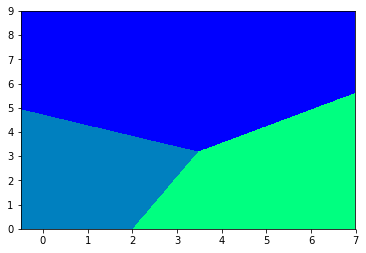

In [13]:
plt.figure()
    
# choose a color scheme 
plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.winter)

#这本质上是一个3D绘图器：接受2维的数据点（x,y)、与点关联的值，来用颜色模型画不同的区域

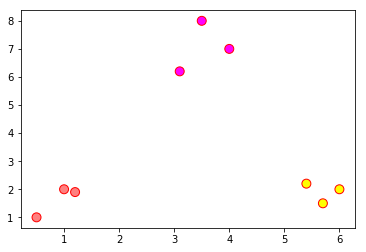

In [14]:
 plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='red', linewidth=1, cmap=plt.cm.spring)

(-0.5, 6.9900000000000064)

(0.0, 8.9900000000000002)

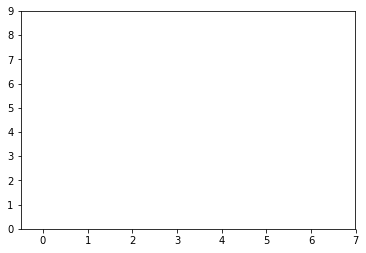

In [15]:
plt.xlim(x_values.min(), x_values.max())
plt.ylim(y_values.min(), y_values.max())
    
plt.show()

(-0.5, 6.9900000000000064)

(0.0, 8.9900000000000002)

([<matplotlib.axis.XTick at 0x10f9357b8>,
 <a list of 7 Text xticklabel objects>)

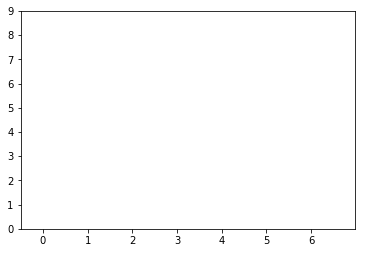

In [18]:
plt.xlim(x_values.min(), x_values.max())
plt.ylim(y_values.min(), y_values.max())
plt.xticks((np.arange(int(min(X[:, 0])-1), int(max(X[:, 0])+1), 1.0)))  # y轴未mark坐标

([<matplotlib.axis.XTick at 0x117d515c0>,
 <a list of 7 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x117e330f0>,
 <a list of 9 Text yticklabel objects>)

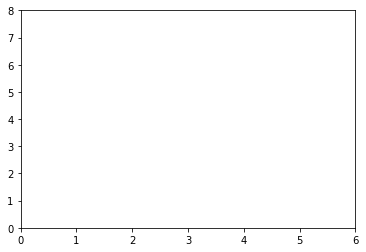

In [17]:
 # x,y轴mark了坐标，但未limit
plt.xticks((np.arange(int(min(X[:, 0])-1), int(max(X[:, 0])+1), 1.0)))
plt.yticks((np.arange(int(min(X[:, 1])-1), int(max(X[:, 1])+1), 1.0)))